## 获取股票数据

In [8]:
import pandas as pd
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt

In [75]:
# 可以获取全部日k线，但是更小周期数据获取有限
hs300 = ts.get_k_data('hs300', start='2012-01-01')
zgpa = ts.get_k_data('601318', start='2012-01-01') # 中国平安
hs300.head()

,date,open,close,high,low,volume,code
0,2012-01-04,2361.50,2298.75,2365.99,2298.30,34344567.0,hs300
1,2012-01-05,2290.78,2276.39,2316.66,2272.15,43016480.0,hs300
2,2012-01-06,2274.35,2290.60,2291.89,2254.57,35198992.0,hs300
3,2012-01-09,2291.18,2368.57,2368.89,2271.72,54727341.0,hs300
4,2012-01-10,2365.77,2447.35,2449.96,2361.28,81154989.0,hs300


## 计算成交量的均值

In [23]:
hs300['volume'].mean()

121232004.33400504

##  画出收盘价

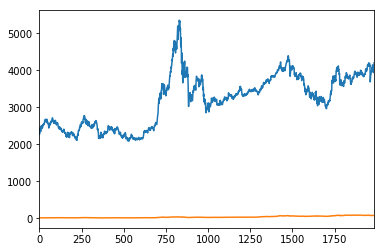

In [125]:
hs300['close'].plot()
zgpa.loc[:, 'close'].plot()
plt.show()

两个价格相差太大，无法直观做笔记，需要先做normalize,再画图。可以看到x轴的刻度并没有变成日期，这在后面将两个股票联合之后再画出来就变化了。

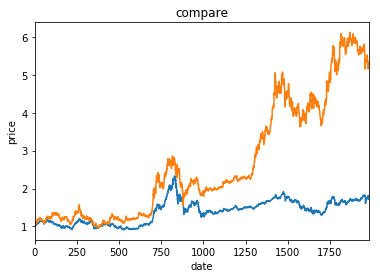

In [143]:
hs_norma = hs300.set_index(['date'])
hs_norma = hs300['close'] / hs300['close'][0]
zgpa_norma = zgpa.set_index(['date'])
zgpa_norma = zgpa.loc[:, 'close'] / zgpa.loc[:, 'close'].iloc[0]
ax = hs_norma.plot(title='compare')
ax.set_xlabel("date")
ax.set_ylabel("price")
zgpa_norma.plot()
plt.show()

## 使用join函数合并两个DataFrame

In [155]:
start_date = '2012-01-01'
end_date = '2012-01-15'
dates = pd.date_range(start_date, end_date)

# 创建一个空的Dataframe
dates_df = pd.DataFrame(index=dates)
dates_df.head()
dates_df.join(hs300)

,date,open,close,high,low,volume,code
2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


由于ds300的索引与dates_df不一致，所以出现了结合起来不正确，需要将ds300重索引。

In [156]:
hs300_ = hs300.set_index(['date'])
dates_df.join(hs300_)

,open,close,high,low,volume,code
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,2361.50,2298.75,2365.99,2298.30,34344567.0,hs300
2012-01-05,2290.78,2276.39,2316.66,2272.15,43016480.0,hs300
2012-01-06,2274.35,2290.60,2291.89,2254.57,35198992.0,hs300
2012-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,2291.18,2368.57,2368.89,2271.72,54727341.0,hs300
2012-01-10,2365.77,2447.35,2449.96,2361.28,81154989.0,hs300


直接调用join会在没有交易的日期里出现NaN，有两种方法可以处理：
1. 使用join的how='inner'参数
2. 使用dropna函数

In [147]:
# dates_df.join(hs300_, how='inner')
dates_df.join(hs300_).dropna()

,open,close,high,low,volume,code
2012-01-04,2361.50,2298.75,2365.99,2298.30,34344567.0,hs300
2012-01-05,2290.78,2276.39,2316.66,2272.15,43016480.0,hs300
2012-01-06,2274.35,2290.60,2291.89,2254.57,35198992.0,hs300
2012-01-09,2291.18,2368.57,2368.89,2271.72,54727341.0,hs300
2012-01-10,2365.77,2447.35,2449.96,2361.28,81154989.0,hs300
2012-01-11,2444.76,2435.61,2453.15,2423.32,58705674.0,hs300
2012-01-12,2426.82,2435.22,2464.38,2423.32,47121275.0,hs300
2012-01-13,2438.41,2394.33,2445.79,2374.54,45513997.0,hs300
2012-01-16,2376.95,2345.65,2394.50,2345.63,30527145.0,hs300
2012-01-17,2347.57,2460.60,2462.43,2329.25,64205648.0,hs300


## 将多个股票联合在一起

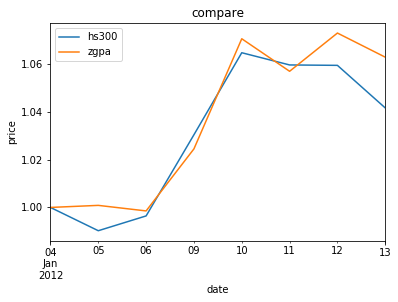

In [162]:
hs300_ = hs300.set_index(['date'])
zgpa_ = zgpa.set_index(['date'])
# 这里只使用收盘价，将‘"close"重命名为"hs300"
hs300_ = hs300_.rename(columns={'close' : 'hs300'})[['hs300']]
# 这里只使用收盘价，将‘"close"重命名为"zgpa"
zgpa_ = zgpa_[['close']].rename(columns={'close':'zgpa'})
dates_df_ = dates_df.join(hs300_, how='inner')
dates_df_ = dates_df_.join(zgpa_, how='inner')

# 画图
dates_df_ = dates_df_ / dates_df_.iloc[0, :]
ax = dates_df_.plot(title='compare')
ax.set_xlabel("date")
ax.set_ylabel("price")
plt.show()